first I must say if there is no order we have a reason and the reason is to teach every single way of evaluation of ml models

In [21]:
#reading the file
import pandas as pd
df=pd.read_csv('dataset/wind_turbines_.csv',)
df.head()

,blade_length,wind_speed,turbine_stats,energy_output,motor_tempreture,blade_angle,vibration_level,humidity,air_pressure,category,anti_rust,efficiency
0,61.0,14.0,off,4055,58,21,7,44,994,large,NaN,46.0
1,24.0,18.0,optimal,151,58,10,2,46,1043,large,0.0,69.0
2,81.0,20.0,optimal,100,32,25,2,80,912,medium,0.0,85.0
3,70.0,9.0,needs to be repaired,3910,68,25,8,32,1068,large,0.0,90.0
4,30.0,15.0,needs to be repaired,5000,74,34,9,54,983,large,1.0,91.0


In [22]:
#details excraction from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blade_length      33258 non-null  float64
 1   wind_speed        33246 non-null  float64
 2   turbine_stats     35000 non-null  object 
 3   energy_output     35000 non-null  int64  
 4   motor_tempreture  35000 non-null  int64  
 5   blade_angle       35000 non-null  int64  
 6   vibration_level   35000 non-null  int64  
 7   humidity          35000 non-null  int64  
 8   air_pressure      35000 non-null  int64  
 9   category          31533 non-null  object 
 10  anti_rust         28033 non-null  float64
 11  efficiency        33259 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB


In [23]:
#mathmatical details excraction from data
df.describe()

,blade_length,wind_speed,energy_output,motor_tempreture,blade_angle,vibration_level,humidity,air_pressure,anti_rust,efficiency
count,33258.000000,33246.00000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,28033.000000,33259.000000
mean,54.979554,14.99988,2555.464114,49.959543,22.627629,4.980486,55.028543,1000.258914,0.498769,49.800475
std,26.296575,6.05709,1417.229324,17.585595,13.300506,3.155538,20.437920,58.200959,0.500007,29.276130
min,10.000000,5.00000,100.000000,20.000000,0.000000,0.000000,20.000000,900.000000,0.000000,0.000000
25%,32.000000,10.00000,1336.000000,35.000000,11.000000,2.000000,37.000000,950.000000,0.000000,24.000000
50%,55.000000,15.00000,2566.000000,50.000000,23.000000,5.000000,55.000000,1000.000000,0.000000,49.000000
75%,78.000000,20.00000,3774.000000,65.000000,34.000000,8.000000,73.000000,1051.000000,1.000000,75.000000
max,100.000000,25.00000,5000.000000,80.000000,45.000000,10.000000,90.000000,1100.000000,1.000000,100.000000


array([[<Axes: title={'center': 'blade_length'}>,
        <Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'energy_output'}>],
       [<Axes: title={'center': 'motor_tempreture'}>,
        <Axes: title={'center': 'blade_angle'}>,
        <Axes: title={'center': 'vibration_level'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'air_pressure'}>,
        <Axes: title={'center': 'anti_rust'}>],
       [<Axes: title={'center': 'efficiency'}>, <Axes: >, <Axes: >]],
      dtype=object)

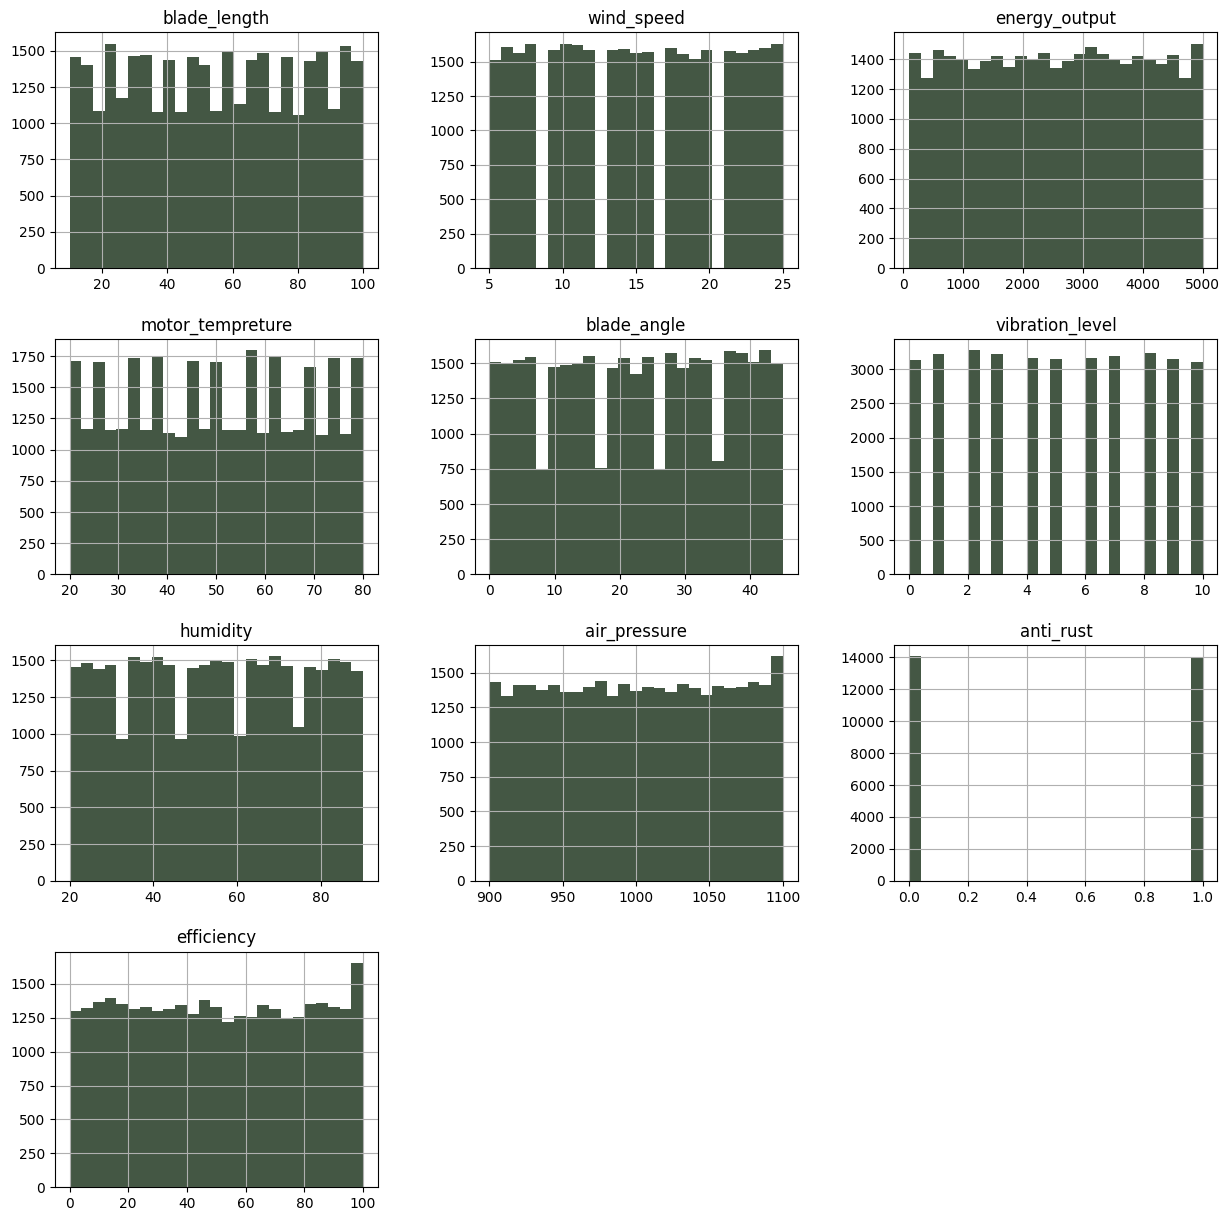

In [24]:
#plotting the hist of dataset
df.hist(bins=25,figsize=(15,15),color="#374C37EF")

In [25]:
#getting the values of categorical atts

df['category'].value_counts()

category
small     10583
large     10505
medium    10445
Name: count, dtype: int64

In [26]:
df['turbine_stats'].value_counts()

turbine_stats
optimal                 11752
needs to be repaired    11679
off                     11569
Name: count, dtype: int64

In [27]:
#defining df_nums by deleting obj values
df_nums=df.drop('turbine_stats',axis=1)
df_nums=df_nums.drop('category',axis=1)

In [28]:
df_nums

,blade_length,wind_speed,energy_output,motor_tempreture,blade_angle,vibration_level,humidity,air_pressure,anti_rust,efficiency
0,61.0,14.0,4055,58,21,7,44,994,NaN,46.0
1,24.0,18.0,151,58,10,2,46,1043,0.0,69.0
2,81.0,20.0,100,32,25,2,80,912,0.0,85.0
3,70.0,9.0,3910,68,25,8,32,1068,0.0,90.0
4,30.0,15.0,5000,74,34,9,54,983,1.0,91.0
...,...,...,...,...,...,...,...,...,...,...
34995,91.0,7.0,1678,42,29,2,26,989,1.0,NaN
34996,46.0,24.0,2409,74,3,4,82,1006,0.0,75.0
34997,97.0,14.0,1257,27,41,10,24,1017,1.0,81.0
34998,72.0,19.0,222,23,7,8,26,916,0.0,20.0


In [29]:
#checking the correlation between energy_output and other atts
corr_matrix=df_nums.corr()
corr_matrix['energy_output'].sort_values(ascending=False)
#as there is no high correlation between atts we would likely try ordinary train_test split


energy_output       1.000000
air_pressure        0.009238
vibration_level     0.002582
humidity            0.001081
blade_length        0.000878
wind_speed         -0.002140
motor_tempreture   -0.003528
efficiency         -0.003720
anti_rust          -0.006294
blade_angle        -0.011396
Name: energy_output, dtype: float64

In [30]:
#we must split train and test set because test must not be snooped(shown to model)
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)


In [31]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline


# Define columns
num_cols = ['blade_length', 'wind_speed', 'energy_output', 'motor_tempreture', 
            'blade_angle', 'vibration_level', 'humidity', 'air_pressure', 'efficiency']
cat_cols = ['category', 'turbine_stats']
binary_cols = ['anti_rust']

# Define numerical pipeline to ensure imputer runs before scaler
num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),  # Impute NaN in numerical columns
    ('scaler', MinMaxScaler())  # Scale to [0,1]
])

# Define ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),  # Apply imputer then scaler to numerical columns
    ('imputer_cat', SimpleImputer(strategy='most_frequent'), cat_cols),  # Impute NaN in categorical columns
    ('imputer_binary', SimpleImputer(strategy='most_frequent'), binary_cols),  # Impute NaN in binary column
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)  # Encode categorical columns
])

# Fit and transform
data_prepared = full_pipeline.fit_transform(train_set)

# Get output column names
encoded_cols = full_pipeline.named_transformers_['encoder'].get_feature_names_out(cat_cols)
imputer_cat_cols = [f"{col}_imputed" for col in cat_cols]
scaled_cols = [f"{col}_scaled" for col in num_cols]
final_cols = scaled_cols + imputer_cat_cols + binary_cols + list(encoded_cols)

# Create DataFrame
data_prepared_df = pd.DataFrame(data_prepared, columns=final_cols)

# Check for NaN and describe scaled numerical columns
print("NaN count:\n", data_prepared_df.isna().sum())
print("\nRange of scaled numerical columns:\n", data_prepared_df[scaled_cols].describe())
print("\nFirst few rows:\n", data_prepared_df.head())

NaN count:
 blade_length_scaled                   0
wind_speed_scaled                     0
energy_output_scaled                  0
motor_tempreture_scaled               0
blade_angle_scaled                    0
vibration_level_scaled                0
humidity_scaled                       0
air_pressure_scaled                   0
efficiency_scaled                     0
category_imputed                      0
turbine_stats_imputed                 0
anti_rust                             0
category_large                        0
category_medium                       0
category_small                        0
category_nan                          0
turbine_stats_needs to be repaired    0
turbine_stats_off                     0
turbine_stats_optimal                 0
dtype: int64

Range of scaled numerical columns:
         blade_length_scaled  wind_speed_scaled  energy_output_scaled  \
count               28000.0            28000.0               28000.0   
unique                 91.0       

In [32]:
data_prepared_df.head()

,blade_length_scaled,wind_speed_scaled,energy_output_scaled,motor_tempreture_scaled,blade_angle_scaled,vibration_level_scaled,humidity_scaled,air_pressure_scaled,efficiency_scaled,category_imputed,turbine_stats_imputed,anti_rust,category_large,category_medium,category_small,category_nan,turbine_stats_needs to be repaired,turbine_stats_off,turbine_stats_optimal
0,1.0,0.5,0.778163,0.033333,0.666667,0.2,0.071429,0.125,0.44,large,needs to be repaired,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.3,0.92102,0.266667,0.622222,0.5,0.714286,0.26,0.51,small,optimal,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.877778,0.5,0.109796,0.866667,0.022222,0.1,0.028571,0.53,0.0,large,off,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.733333,0.3,0.550612,0.6,0.8,0.7,0.857143,0.785,0.25,small,off,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.144444,0.5,0.674694,0.883333,0.377778,0.8,0.414286,0.095,0.49,small,optimal,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
#defining df_nums from data_prepared_df
df_nums=data_prepared_df.drop(['turbine_stats_imputed','category_imputed'],axis=1)

In [34]:
#splitting the data into labels and features
train_X=data_prepared_df.drop(['energy_output_scaled','category_imputed','turbine_stats_imputed'],axis=1)
train_y=data_prepared_df['energy_output_scaled']
test_x=test_set.drop(['energy_output','category','turbine_stats'],axis=1)
test_y=test_set['energy_output']
train_X

,blade_length_scaled,wind_speed_scaled,motor_tempreture_scaled,blade_angle_scaled,vibration_level_scaled,humidity_scaled,air_pressure_scaled,efficiency_scaled,anti_rust,category_large,category_medium,category_small,category_nan,turbine_stats_needs to be repaired,turbine_stats_off,turbine_stats_optimal
0,1.0,0.5,0.033333,0.666667,0.2,0.071429,0.125,0.44,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.3,0.266667,0.622222,0.5,0.714286,0.26,0.51,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.877778,0.5,0.866667,0.022222,0.1,0.028571,0.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.733333,0.3,0.6,0.8,0.7,0.857143,0.785,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.144444,0.5,0.883333,0.377778,0.8,0.414286,0.095,0.49,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.5,0.3,0.483333,0.555556,0.9,0.628571,0.055,0.68,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
27996,0.688889,0.3,0.95,0.066667,0.8,0.928571,0.38,0.91,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
27997,0.533333,0.5,0.066667,0.888889,0.7,0.842857,0.205,0.54,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27998,0.988889,0.1,0.6,0.711111,1.0,0.557143,0.755,0.02,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
#creating and measuring the performance of model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
lin_reg=LinearRegression()
lin_reg.fit(train_X,train_y)
predicted=lin_reg.predict(train_X)
root_mean_squared_error(y_pred=predicted,y_true=train_y)

0.28867033170219053

OOps the cost_fun is too low it must be close to 1

In [36]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(lin_reg,train_X,train_y,cv=7,scoring='neg_root_mean_squared_error')
scores=-val_score
scores

array([0.29224908, 0.28962701, 0.28845827, 0.2858982 , 0.28749636,
       0.28675142, 0.29123301])

It is still too low so we must evaluate it 


In [37]:
#there are multiple methods of rising this cost function 1rst we would do some feature engineerning and develope new features that might have
#higher correlation with target label y
df_nums['motor_tempreture_comparedto_vibration']=data_prepared_df['motor_tempreture_scaled']/data_prepared_df['vibration_level_scaled'].replace(0,0.00000000000000001)
corr_matrix=df_nums.corr()
corr_matrix['energy_output_scaled'].sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_45412\1654374149.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_nums['motor_tempreture_comparedto_vibration']=data_prepared_df['motor_tempreture_scaled']/data_prepared_df['vibration_level_scaled'].replace(0,0.00000000000000001)


energy_output_scaled                     1.000000
air_pressure_scaled                      0.013150
humidity_scaled                          0.009043
category_large                           0.006330
vibration_level_scaled                   0.005182
wind_speed_scaled                        0.003315
turbine_stats_off                        0.003171
category_small                           0.002742
turbine_stats_needs to be repaired       0.000500
blade_length_scaled                      0.000048
motor_tempreture_scaled                 -0.003155
turbine_stats_optimal                   -0.003657
efficiency_scaled                       -0.004633
category_medium                         -0.004767
motor_tempreture_comparedto_vibration   -0.006107
category_nan                            -0.006555
anti_rust                               -0.014392
blade_angle_scaled                      -0.014679
Name: energy_output_scaled, dtype: float64

the new feature does not have a good corr either so we will create another feature 

In [38]:
df_nums['vibration_comparedto_motor_tempreture']=data_prepared_df['vibration_level_scaled']/data_prepared_df['motor_tempreture_scaled'].replace(0,0.00000000000000001)
corr_matrix=df_nums.corr()
corr_matrix['energy_output_scaled'].sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_45412\2288945414.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_nums['vibration_comparedto_motor_tempreture']=data_prepared_df['vibration_level_scaled']/data_prepared_df['motor_tempreture_scaled'].replace(0,0.00000000000000001)


energy_output_scaled                     1.000000
air_pressure_scaled                      0.013150
humidity_scaled                          0.009043
category_large                           0.006330
vibration_level_scaled                   0.005182
vibration_comparedto_motor_tempreture    0.003574
wind_speed_scaled                        0.003315
turbine_stats_off                        0.003171
category_small                           0.002742
turbine_stats_needs to be repaired       0.000500
blade_length_scaled                      0.000048
motor_tempreture_scaled                 -0.003155
turbine_stats_optimal                   -0.003657
efficiency_scaled                       -0.004633
category_medium                         -0.004767
motor_tempreture_comparedto_vibration   -0.006107
category_nan                            -0.006555
anti_rust                               -0.014392
blade_angle_scaled                      -0.014679
Name: energy_output_scaled, dtype: float64

this one has a better correlation yet not satisfying let us use another model

there might be a reason for this low cost fun and the reason is that model is quite simple we could make it more complex or we could set
the right hyperparamethers


In [41]:
#we would like to use another model which is called random forest and have better evaluation using randomized search cv for hyperparamethers
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_dict={
    'n_estimators':np.arange(100,200)
    ,'max_depth':np.arange(5,10)
    
}
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_search=RandomizedSearchCV(random_forest,param_distributions=param_dict,n_iter=20)
random_search.fit(train_X,train_y)
pred_random=random_search.predict(train_X)

In [42]:
root_mean_squared_error(y_pred=pred_random,y_true=train_y)

0.2853990270347377

It is not a good output for costfunction either what do we do??? I think implementing methods to set params the way that cost fun j is 
reduced is an ideal way
